In [90]:
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

In [2]:
train, test = keras.datasets.mnist.load_data()

In [3]:
xtrain, ytrain = train
xtest , ytest = test

In [4]:
xtrain.shape

(60000, 28, 28)

In [5]:
xtest.shape

(10000, 28, 28)

In [6]:
ytest[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [46]:
def diplayImage(index, img_set, label_set): 
    plt.figure(figsize=(3,3))
    plt.imshow(img_set[index])
    plt.title(f'Image for Number {label_set[index]}')
    plt.show()

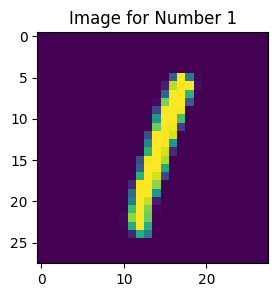

In [47]:
diplayImage(5, xtest, ytest)

In [9]:
# 

In [10]:
xtrain_scale = xtrain/255
xtest_scale =  xtest/255

In [11]:
xtrain_scale[0].shape
ytrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
# BUIDING THE ANN model MODEL.. 

In [23]:
img_dim = 28 * 28
model = keras.Sequential([
    # dense layer...
    keras.layers.Flatten(input_shape=(28,28)), 
    keras.layers.Dense(28, activation='relu'), 
    keras.layers.Dense(10, activation ='sigmoid')
])

In [24]:
model.compile(
    optimizer='adam', 
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 28)                21980     
                                                                 
 dense_8 (Dense)             (None, 10)                290       
                                                                 
Total params: 22,270
Trainable params: 22,270
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(xtrain, ytrain, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 1.9238 - accuracy: 0.5440
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8637 - accuracy: 0.7404
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5568 - accuracy: 0.8359
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4240 - accuracy: 0.8819
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3600 - accuracy: 0.9038


In [ ]:
#  TRAINING CNN MODEL....

In [27]:
cnn_model = keras.Sequential([
    # cnn layers
    keras.layers.Conv2D(32, 3, input_shape=(28,28,1), activation='relu'), 
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(64, 3, activation='relu'), 
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(128, 3, activation='relu'), 
    keras.layers.MaxPooling2D((2,2)),
    
    # dense layer...
    keras.layers.Flatten(), 
    keras.layers.Dense(64, activation='relu'), 
    keras.layers.Dense(10, activation ='sigmoid')
])

In [28]:
cnn_model.compile(
    optimizer='adam', 
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_9 (Dense)             (None, 28)               

In [29]:
history = cnn_model.fit(xtrain, ytrain, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 61s 32ms/step - loss: 0.5195 - accuracy: 0.8589
Epoch 2/5
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0786 - accuracy: 0.9772
Epoch 3/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0568 - accuracy: 0.9834
Epoch 4/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0431 - accuracy: 0.9868
Epoch 5/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0369 - accuracy: 0.9884


In [94]:
cnn_model.save('numeric_detector')
print('model saved successfully')

INFO:tensorflow:Assets written to: numeric_detector\assets


INFO:tensorflow:Assets written to: numeric_detector\assets


model saved successfully


In [76]:
prediction = cnn_model.predict(xtest)

313/313 [==============================] - 4s 13ms/step


In [84]:
# diplayImage(0, xtest, ytest)

4
[1.3927774e-09 9.9687213e-01 9.8101658e-01 6.3532730e-07 1.0000000e+00
 9.2359728e-01 4.0819596e-02 9.9999976e-01 9.4844168e-01 9.9682844e-01]


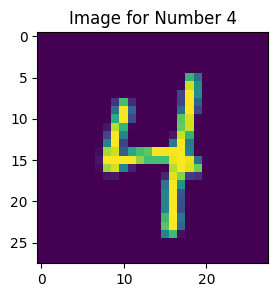

In [81]:
import numpy as np
index = 19
pre = np.argmax(prediction[index])
print(pre)
print(prediction[index])
diplayImage(index, xtest, ytest)

In [82]:
from sklearn.metrics import classification_report
predict = [np.argmax(re) for re in prediction]
report  = classification_report(ytest, predict)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.66      0.99      0.79      1010
           4       0.97      0.97      0.97       982
           5       0.94      0.40      0.56       892
           6       0.98      0.99      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.96      0.98      0.97       974
           9       0.98      0.93      0.96      1009

    accuracy                           0.93     10000
   macro avg       0.94      0.92      0.92     10000
weighted avg       0.94      0.93      0.92     10000



In [87]:
# QUANTUMIZATION using TF lite Module... 

In [103]:
# post training quantization
converter =  tf.lite.TFLiteConverter.from_saved_model('numeric_detector')
converter.optimizations = [tf.lite.Optimize.DEFAULT]
cnn_lite_model = converter.convert()

In [ ]:
# pre training quantization

In [120]:
import tensorflow_model_optimization as tfopt

q_cnn_model = tfopt.quantization.keras.quantize_model(cnn_model)
# q_cnn_model = quant_object(cnn_model)

In [121]:
q_cnn_model.compile(
    optimizer='adam', 
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
q_cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 quantize_layer_2 (QuantizeL  (None, 28, 28, 1)        3         
 ayer)                                                           
                                                                 
 quant_conv2d (QuantizeWrapp  (None, 26, 26, 32)       387       
 erV2)                                                           
                                                                 
 quant_max_pooling2d (Quanti  (None, 13, 13, 32)       1         
 zeWrapperV2)                                                    
                                                                 
 quant_conv2d_1 (QuantizeWra  (None, 11, 11, 64)       18627     
 pperV2)                                                         
                                                                 
 quant_max_pooling2d_1 (Quan  (None, 5, 5, 64)        

In [122]:
history = q_cnn_model.fit(xtrain, ytrain, epochs=1)

1875/1875 [==============================] - 69s 36ms/step - loss: 0.0622 - accuracy: 0.9858


In [113]:
q_cnn_model.evaluate(xtest, ytest)

313/313 [==============================] - 3s 9ms/step - loss: 0.0520 - accuracy: 0.9858


[0.05196426436305046, 0.98580002784729]

In [114]:
q_predictions = q_cnn_model.predict(xtest)

313/313 [==============================] - 3s 10ms/step


In [133]:
q_cnn_model.save('qlit.h5')

3
[1.6330122e-09 3.8565705e-03 1.7479579e-03 1.0000000e+00 1.9230292e-12
 1.9750868e-04 9.7344977e-09 9.2947781e-01 7.9133135e-04 1.0893898e-04]


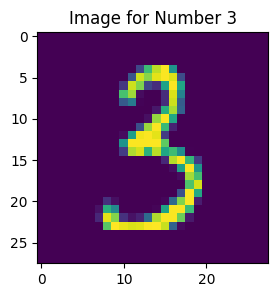

In [118]:
index = 76
pre = np.argmax(q_predictions[index])
print(pre)
print(q_predictions[index])
diplayImage(index, xtest, ytest)

In [126]:
qt_converter = tf.lite.TFLiteConverter.from_keras_model(q_cnn_model)
qt_converter.optimizations = [tf.lite.Optimize.DEFAULT]
qlite_cnn_model = qt_converter.convert()

INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpk6lfimxf\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpk6lfimxf\assets
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\tensorflow\lite\python\convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


In [127]:
# saving tensorflowlit on device.. 
with open('handigit_qantum_model.tflite', 'wb') as file: 
    file.write(qlite_cnn_model)

In [18]:
import numpy as np 
import cv2

def preprocessed_image(raw_image):
    raw_image = cv2.resize(raw_image, (28,28))
    img = raw_image.astype('float32')
    img = img[:,:, np.newaxis]
    img_dim = np.array([img])
    print(img_dim.shape)
    return img_dim

def quantum_prediction(model_path, image): 
    # Load the saved TensorFlow Lite Quantum model
    # interpreter = tf.lite.Interpreter(model_path='handigit_qantum_model.tflite')
    interpreter = tf.lite.Interpreter(model_path=model_path)
    interpreter.allocate_tensors()
    
    # Get input and output details
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    
    # Assuming single input and output
    input_shape = input_details[0]['shape']
    output_shape = output_details[0]['shape']
    # Prepare input data for prediction
    input_data = image
    # Set input tensor
    interpreter.set_tensor(input_details[0]['index'], input_data)
    # Run inference
    interpreter.invoke()
    # Get the output
    output_data = interpreter.get_tensor(output_details[0]['index'])
    # Your prediction is now in the 'output_data' variable
    print("Prediction:", output_data)   

    return np.argmax(output_data)

In [167]:
clean_img = preprocessed_image(xtest[44])
prediction = quantum_prediction('handigit_qantum_model.tflite',clean_img) 
print(f'Quantum Prediction: {prediction}')

(1, 28, 28, 1)
Prediction: [[0.         0.02734375 0.25390625 0.99609375 0.         0.00390625
  0.         0.74609375 0.015625   0.        ]]
Quantum Prediction: 3


3
[5.5593055e-06 3.3177599e-02 1.5283430e-02 9.9999958e-01 1.0982341e-09
 8.9339708e-05 6.2719710e-07 7.6677096e-01 9.6478383e-04 1.6197738e-04]


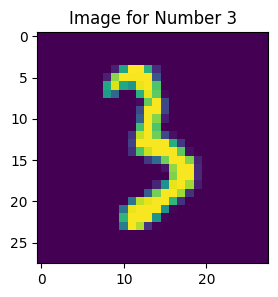

In [168]:
index = 44
pre = np.argmax(q_predictions[index])
print(pre)
print(q_predictions[index])
diplayImage(index, xtest, ytest)

In [1]:
# MODEL DEVELOPEMENT COMPLETE ....

In [5]:
import tensorflow as tf

# Load the saved TensorFlow Lite Quantum model
interpreter = tf.lite.Interpreter(model_path='handigit_qantum_model.tflite')
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Assuming single input and output
input_shape = input_details[0]['shape']
output_shape = output_details[0]['shape']
# Prepare input data for prediction
input_data = img_dim
# Set input tensor
interpreter.set_tensor(input_details[0]['index'], input_data)
# Run inference
interpreter.invoke()
# Get the output
output_data = interpreter.get_tensor(output_details[0]['index'])
# Your prediction is now in the 'output_data' variable
print("Prediction:", output_data)

NameError: name 'img_dim' is not defined

In [140]:
img = xtrain_scale[0]
img = img.astype('float32')

In [148]:
input_details

[{'name': 'serving_default_conv2d_input:0',
  'index': 0,
  'shape': array([ 1, 28, 28,  1]),
  'shape_signature': array([-1, 28, 28,  1]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [157]:
img = img[:,:, np.newaxis]
img_dim = np.array([img])
img_dim.shape

(1, 28, 28, 1)

##### MAKING PREDICTION FROM REAL CAMMERA FEEDS.... 

In [19]:
import cv2
import PIL
from matplotlib import pyplot as plt


In [3]:
# dir(cv2)

In [4]:
# !pip install opencv-python

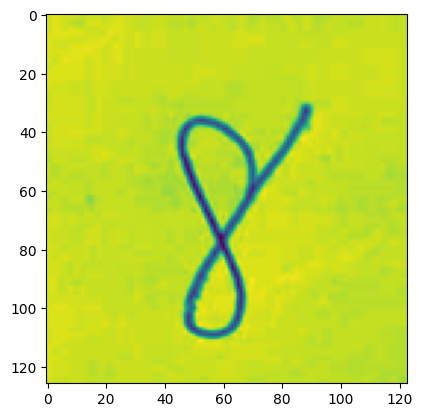

In [73]:
img = cv2.imread('sample5.png')
new_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(new_img)
plt.show()

In [74]:
clean_img = preprocessed_image(new_img)
prediction = quantum_prediction('handigit_qantum_model.tflite',clean_img) 
print(f'Quantum Prediction: {prediction}')

(1, 28, 28, 1)
Prediction: [[0.5        0.25390625 0.21875    0.0859375  0.4453125  0.15234375
  0.65625    0.296875   0.34375    0.15234375]]
Quantum Prediction: 6


In [67]:
print(new_img.shape)

(153, 148, 3)


In [4]:
cam = cv2.VideoCapture(0)


while True: 
    ret, frame = cam.read()
    # print(ret)

    # show vid 
    cv2.imshow('face', frame)

    
    # stop vid
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break 

cam.release()
cv2.destroyAllWindows()